## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./datasets/apps.csv', index_col=0)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Getting to know the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [8]:
df.describe()

,Rating,Reviews,Size
count,8196.000000,9.659000e+03,8432.000000
mean,4.173243,2.165926e+05,20.395327
std,0.536625,1.831320e+06,21.827509
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000
50%,4.300000,9.670000e+02,12.000000
75%,4.500000,2.940100e+04,28.000000
max,5.000000,7.815831e+07,100.000000


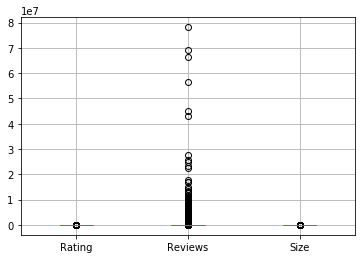

In [12]:
df.boxplot()

In [14]:
df.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [16]:
df.Rating.isna().sum()

1463

In [18]:
df.Size.isna().sum()

1227

In [73]:
df['Current Ver'].isna().sum()

8

In [74]:
df['Android Ver'].isna().sum()

2

## Cleaning the data

In [21]:
#checking for outliers in ratings
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [65]:
def impute_median(series):
    return series.fillna(series.median())

In [66]:
df.Rating=impute_median(df.Rating)
df.Rating.isna().sum()

0

In [68]:
df.Size = impute_median(df.Size)
df.Size.isna().sum()

0

In [85]:
df['Android Ver'].fillna(str(df['Android Ver'].mode()), inplace=True)
df['Android Ver'].isna().sum()

0

In [88]:
df['Current Ver'].fillna(str(df['Current Ver'].mode()), inplace=True)
df['Current Ver'].isna().sum()

0

In [90]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [92]:
df.Rating = df.Rating.astype('float64')
df.Size = df.Size.astype('float64')

In [111]:
df.Installs=df.Installs.apply(lambda x: x.strip('+').replace(',',''))
df.Installs.astype('int32')

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9659, dtype: int32

In [130]:
df.Price=df.Price.apply(lambda x: x.strip('$'))
df.Price.astype('float64')

9917    394.99
7434      0.00
5307     13.99
9905     30.99
5945      2.99
         ...  
2550      0.00
1655      0.00
3755      0.00
1662      0.00
378       0.00
Name: Price, Length: 9659, dtype: float64

In [133]:
df=df.sort_values(['Installs','Price'])

## Task 1: Plot relation between app size and number of Installs

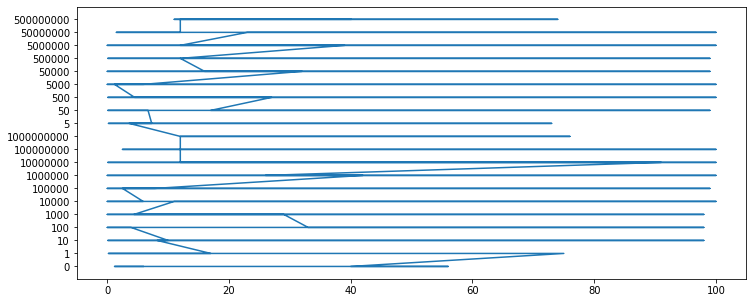

In [135]:
plt.figure(figsize=(12,5)) 
plt.plot(df.Size, df.Installs)
plt.show()

## Task 2: Plot app prices based on categories

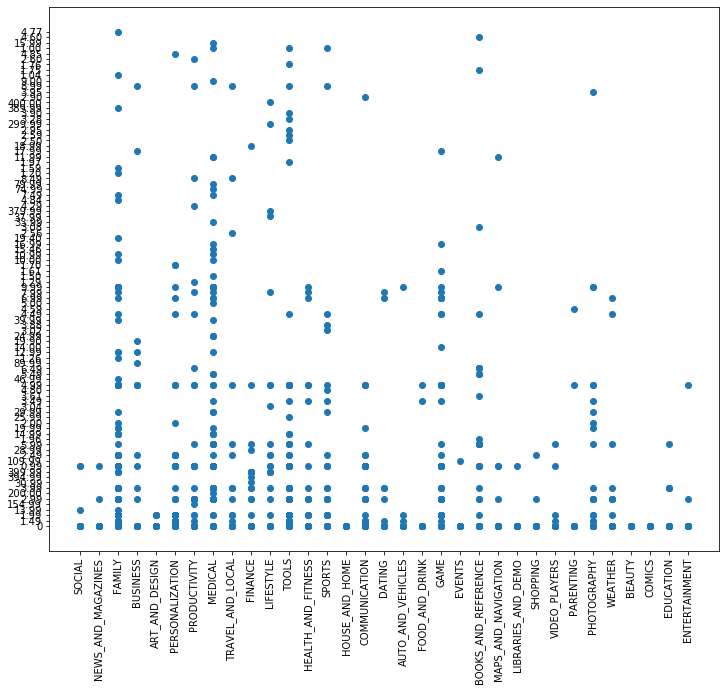

In [140]:
plt.figure(figsize=(12,10)) 
plt.scatter(df.Category, df.Price)
plt.xticks(rotation=90)
plt.show()